In [ ]:
!pip install geopandas
!pip install folium -U
!pip install mapclassify

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 49.4 MB/s 
     |████████████████████████████████| 16.7 MB 61.3 MB/s 
     |████████████████████████████████| 95 kB 2.8 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which is incompatible.


In [ ]:
import pandas as pd
import geopandas as gpd
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import matplotlib as mpl
import folium
import mapclassify

In [ ]:
urls = ['https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_BAGONG_SILANG.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_CALENDOLA.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_CHRYSANTHEMUM.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_CUYAB.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_ESTRELLA.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_FATIMA.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_G_S_I_S_.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_LANDAYAN.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_LANGGAM.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_LARAM.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_MAGSAYSAY.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_MAHARLIKA.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_NARRA.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_NUEVA.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_PACITA_1.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_PACITA_2.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_POBLACION.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_RIVERSIDE.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_ROSARIO.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_SAMPAGUITA_VILLAGE.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_SANTO_NI__O.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_SAN_ANTONIO.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_SAN_LORENZO_RUIZ.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_SAN_ROQUE.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_SAN_VICENTE.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_UNITED_BAYANIHAN.json.gz',
        'https://eleksyondata3.gmanews.tv/all_lvgs_results/REGION_IV-A_LAGUNA_SAN_PEDRO_CITY_UNITED_BETTER_LIVING.json.gz']

In [ ]:
results_df = []

for url in urls:
  df = pd.read_json(url)
  results_df.append(df)

results_df

[                                               result  ... processed_by
 0   {'contest': 'PRESIDENT PHILIPPINES', 'candidat...  ...        LOCAL
 1   {'contest': 'VICE-PRESIDENT PHILIPPINES', 'can...  ...        LOCAL
 2   {'contest': 'SENATOR PHILIPPINES', 'candidates...  ...        LOCAL
 3   {'contest': 'PROVINCIAL GOVERNOR LAGUNA', 'can...  ...        LOCAL
 4   {'contest': 'PROVINCIAL VICE-GOVERNOR LAGUNA',...  ...        LOCAL
 5   {'contest': 'MEMBER, SANGGUNIANG PANLALAWIGAN ...  ...        LOCAL
 6   {'contest': 'MEMBER, HOUSE OF REPRESENTATIVES ...  ...        LOCAL
 7   {'contest': 'MAYOR LAGUNA - SAN PEDRO CITY', '...  ...        LOCAL
 8   {'contest': 'VICE-MAYOR LAGUNA - SAN PEDRO CIT...  ...        LOCAL
 9   {'contest': 'MEMBER, SANGGUNIANG PANLUNGSOD LA...  ...        LOCAL
 10  {'contest': 'PARTY LIST PHILIPPINES', 'candida...  ...        LOCAL
 
 [11 rows x 6 columns],
                                                result  ... processed_by
 0   {'contest': 'PRESIDE

In [ ]:
results = pd.concat(results_df)
results

,result,location_code,total_voters_processed,election_returns_processed,result_as_of,processed_by
0,"{'contest': 'PRESIDENT PHILIPPINES', 'candidat...",REGION IV-A|LAGUNA|SAN PEDRO CITY|BAGONG SILANG,2514/3142,5/5,05/18/2016 19:45:00,LOCAL
1,"{'contest': 'VICE-PRESIDENT PHILIPPINES', 'can...",REGION IV-A|LAGUNA|SAN PEDRO CITY|BAGONG SILANG,2514/3142,5/5,05/18/2016 19:45:00,LOCAL
2,"{'contest': 'SENATOR PHILIPPINES', 'candidates...",REGION IV-A|LAGUNA|SAN PEDRO CITY|BAGONG SILANG,2514/3142,5/5,05/18/2016 19:45:00,LOCAL
3,"{'contest': 'PROVINCIAL GOVERNOR LAGUNA', 'can...",REGION IV-A|LAGUNA|SAN PEDRO CITY|BAGONG SILANG,2514/3142,5/5,05/18/2016 19:45:00,LOCAL
4,"{'contest': 'PROVINCIAL VICE-GOVERNOR LAGUNA',...",REGION IV-A|LAGUNA|SAN PEDRO CITY|BAGONG SILANG,2514/3142,5/5,05/18/2016 19:45:00,LOCAL
...,...,...,...,...,...,...
6,"{'contest': 'MEMBER, HOUSE OF REPRESENTATIVES ...",REGION IV-A|LAGUNA|SAN PEDRO CITY|UNITED BETTE...,2276/2804,4/4,05/18/2016 19:45:00,LOCAL
7,"{'contest': 'MAYOR LAGUNA - SAN PEDRO CITY', '...",REGION IV-A|LAGUNA|SAN PEDRO CITY|UNITED BETTE...,2276/2804,4/4,05/18/2016 19:45:00,LOCAL
8,{'contest': 'VICE-MAYOR LAGUNA - SAN PEDRO CIT...,REGION IV-A|LAGUNA|SAN PEDRO CITY|UNITED BETTE...,2276/2804,4/4,05/18/2016 19:45:00,LOCAL
9,"{'contest': 'MEMBER, SANGGUNIANG PANLUNGSOD LA...",REGION IV-A|LAGUNA|SAN PEDRO CITY|UNITED BETTE...,2276/2804,4/4,05/18/2016 19:45:00,LOCAL


In [ ]:
barangay = []
votes_marcos = []
votes_robredo = []

for i in range(1, 296, 11):
  brgy = results.iloc[i][1]
  robredo = results.iloc[i][0]['candidates'][4]
  marcos = results.iloc[i][0]['candidates'][2]
  barangay.append(brgy)
  votes_marcos.append(marcos)
  votes_robredo.append(robredo)
  

print(barangay)
print(votes_marcos)
print(votes_robredo)

['REGION IV-A|LAGUNA|SAN PEDRO CITY|BAGONG SILANG', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|CALENDOLA', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|CHRYSANTHEMUM', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|CUYAB', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|ESTRELLA', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|FATIMA', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|G.S.I.S.', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|LANDAYAN', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|LANGGAM', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|LARAM', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|MAGSAYSAY', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|MAHARLIKA', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|NARRA', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|NUEVA', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|PACITA 1', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|PACITA 2', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|POBLACION', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|RIVERSIDE', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|ROSARIO', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|SAMPAGUITA VILLAGE', 'REGION IV-A|LAGUNA|SAN PEDRO CITY|SANTO NIÑO', 'REGION IV-A|LAGUNA|SA

In [ ]:
dframe_1 = pd.DataFrame(barangay)
dframe_1.columns=['barangay']
dframe_1

,barangay
0,REGION IV-A|LAGUNA|SAN PEDRO CITY|BAGONG SILANG
1,REGION IV-A|LAGUNA|SAN PEDRO CITY|CALENDOLA
2,REGION IV-A|LAGUNA|SAN PEDRO CITY|CHRYSANTHEMUM
3,REGION IV-A|LAGUNA|SAN PEDRO CITY|CUYAB
4,REGION IV-A|LAGUNA|SAN PEDRO CITY|ESTRELLA
5,REGION IV-A|LAGUNA|SAN PEDRO CITY|FATIMA
6,REGION IV-A|LAGUNA|SAN PEDRO CITY|G.S.I.S.
7,REGION IV-A|LAGUNA|SAN PEDRO CITY|LANDAYAN
8,REGION IV-A|LAGUNA|SAN PEDRO CITY|LANGGAM
9,REGION IV-A|LAGUNA|SAN PEDRO CITY|LARAM


In [ ]:
dframe_2 = pd.DataFrame(votes_marcos)
dframe_2.head()

,name,vote_count,party
0,"MARCOS, BONGBONG (IND)",1190,LIBERAL PARTY|IND
1,"MARCOS, BONGBONG (IND)",827,LIBERAL PARTY|IND
2,"MARCOS, BONGBONG (IND)",1851,LIBERAL PARTY|IND
3,"MARCOS, BONGBONG (IND)",3410,LIBERAL PARTY|IND
4,"MARCOS, BONGBONG (IND)",1145,LIBERAL PARTY|IND


In [ ]:
dframe_3 = pd.DataFrame(votes_robredo)
dframe_3.head()

,name,vote_count,party
0,"ROBREDO, LENI DAANG MATUWID (LP)",595,LIBERAL PARTY|LP
1,"ROBREDO, LENI DAANG MATUWID (LP)",612,LIBERAL PARTY|LP
2,"ROBREDO, LENI DAANG MATUWID (LP)",1671,LIBERAL PARTY|LP
3,"ROBREDO, LENI DAANG MATUWID (LP)",2079,LIBERAL PARTY|LP
4,"ROBREDO, LENI DAANG MATUWID (LP)",852,LIBERAL PARTY|LP


In [ ]:
robredo_marcos = dframe_1.copy()
robredo_marcos['votes_marcos'] = dframe_2['vote_count'].astype(int)
robredo_marcos['votes_robredo'] = dframe_3['vote_count'].astype(int)
robredo_marcos['lead'] = robredo_marcos['votes_marcos'] - robredo_marcos['votes_robredo']

win_list = []

for i in range(27):
  if robredo_marcos.iloc[i][1] > robredo_marcos.iloc[i][2]:
    a = 0
  else:
    a = 1
  win_list.append(a)

robredo_marcos['winner'] = win_list
df_split = robredo_marcos['barangay'].str.split("|", n = 3, expand = True)
robredo_marcos['barangay'] = df_split[3]
robredo_marcos

,barangay,votes_marcos,votes_robredo,lead,winner
0,BAGONG SILANG,1190,595,595,0
1,CALENDOLA,827,612,215,0
2,CHRYSANTHEMUM,1851,1671,180,0
3,CUYAB,3410,2079,1331,0
4,ESTRELLA,1145,852,293,0
5,FATIMA,1221,1016,205,0
6,G.S.I.S.,456,471,-15,1
7,LANDAYAN,4848,3017,1831,0
8,LANGGAM,4072,2469,1603,0
9,LARAM,1013,619,394,0


In [ ]:
url = 'https://raw.githubusercontent.com/faeldon/philippines-json-maps/master/geojson/barangays/hires/barangays-municity-ph043425000.0.1.json'
sanpedrocity = gpd.read_file(url)
sanpedrocity = sanpedrocity.sort_values(by='ADM4_EN')
sanpedrocity['ADM4_EN'] = sanpedrocity['ADM4_EN'].str.upper()
sanpedrocity

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry
0,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425001,BAGONG SILANG,"POLYGON ((121.02806 14.33659, 121.02709 14.334..."
18,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425021,CALENDOLA,"POLYGON ((121.03767 14.33903, 121.03609 14.339..."
20,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425023,CHRYSANTHEMUM,"POLYGON ((121.05053 14.34102, 121.04935 14.340..."
1,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425002,CUYAB,"POLYGON ((121.06730 14.36992, 121.06652 14.369..."
2,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425003,ESTRELLA,"POLYGON ((121.02284 14.33585, 121.01747 14.332..."
21,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425024,FATIMA,"POLYGON ((121.05688 14.35886, 121.06042 14.352..."
3,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425004,G.S.I.S.,"POLYGON ((121.04153 14.34937, 121.04002 14.347..."
4,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425005,LANDAYAN,"POLYGON ((121.06850 14.36177, 121.06903 14.361..."
5,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425006,LANGGAM,"POLYGON ((121.02291 14.33179, 121.02290 14.330..."
6,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425007,LARAM,"POLYGON ((121.02532 14.32877, 121.02384 14.328..."


In [ ]:
robredo_marcos = sanpedrocity.merge(robredo_marcos, how = 'left', left_on = ['ADM4_EN'], right_on = ['barangay'])

color_list = []

for i in range(27):
  if robredo_marcos.winner[i] == 0:
    color = 'r'
  else:
    color = 'y'
  color_list.append(color)

robredo_marcos['color'] = color_list
robredo_marcos

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry,barangay,votes_marcos,votes_robredo,lead,winner,color
0,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425001,BAGONG SILANG,"POLYGON ((121.02806 14.33659, 121.02709 14.334...",BAGONG SILANG,1190,595,595,0,r
1,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425021,CALENDOLA,"POLYGON ((121.03767 14.33903, 121.03609 14.339...",CALENDOLA,827,612,215,0,r
2,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425023,CHRYSANTHEMUM,"POLYGON ((121.05053 14.34102, 121.04935 14.340...",CHRYSANTHEMUM,1851,1671,180,0,r
3,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425002,CUYAB,"POLYGON ((121.06730 14.36992, 121.06652 14.369...",CUYAB,3410,2079,1331,0,r
4,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425003,ESTRELLA,"POLYGON ((121.02284 14.33585, 121.01747 14.332...",ESTRELLA,1145,852,293,0,r
5,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425024,FATIMA,"POLYGON ((121.05688 14.35886, 121.06042 14.352...",FATIMA,1221,1016,205,0,r
6,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425004,G.S.I.S.,"POLYGON ((121.04153 14.34937, 121.04002 14.347...",G.S.I.S.,456,471,-15,1,y
7,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425005,LANDAYAN,"POLYGON ((121.06850 14.36177, 121.06903 14.361...",LANDAYAN,4848,3017,1831,0,r
8,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425006,LANGGAM,"POLYGON ((121.02291 14.33179, 121.02290 14.330...",LANGGAM,4072,2469,1603,0,r
9,PH040000000,REGION IV-A (CALABARZON),PH043400000,LAGUNA,PH043425000,CITY OF SAN PEDRO,PH043425007,LARAM,"POLYGON ((121.02532 14.32877, 121.02384 14.328...",LARAM,1013,619,394,0,r


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


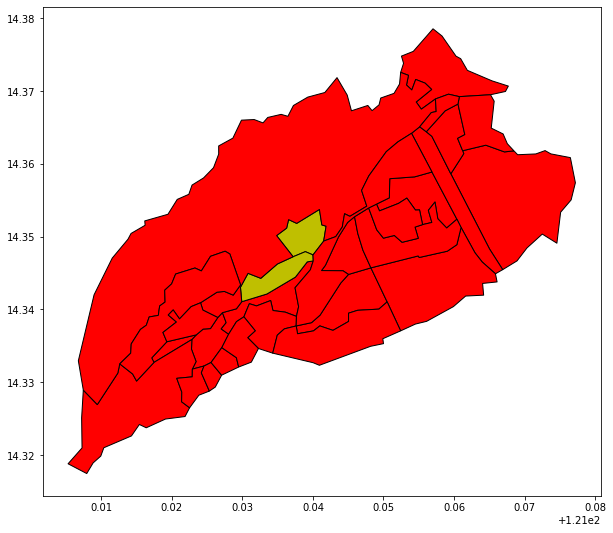

In [ ]:
robredo_marcos_win = robredo_marcos.plot(figsize=(16,9), column='winner', color=robredo_marcos['color'], edgecolor='black')
robredo_marcos_win

In [ ]:
lead_colors = []

for i in range(27):
  if 1500 < robredo_marcos.lead[i] <= 2000:
    color = '#ff001b'
  elif 1000 < robredo_marcos.lead[i] <= 1500:
    color = '#ff446f'
  elif 500 < robredo_marcos.lead[i] <= 1000:
    color = '#ff79b1'
  elif 0 < robredo_marcos.lead[i] <= 500:
    color = '#ffa9e1'
  elif robredo_marcos.lead[i] == 0:
    color = '#ffeeff'
  else:
    color = '#ffddf6'
  lead_colors.append(color)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


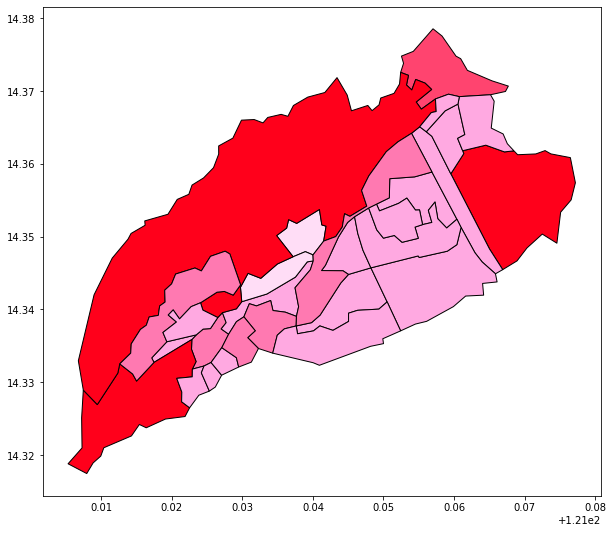

In [ ]:
robredo_marcos_lead = robredo_marcos.plot(figsize=(16,9), column='lead', color=lead_colors, edgecolor='black')
robredo_marcos_lead